# Task 2: Visualizing fire scars through false color

## Instructions

- First, update the following cell to have a link to Homework 4 GitHub repository:

**UPDATE THIS LINK**
https://github.com/aakriti-poudel-chhetri/eds220-hwk4

- Review the [complete rubric for this task](https://docs.google.com/document/d/1-Zm731BLVCs1MXHT5R1H9rr6uvcwHnMZQ2q8xkQ_fWM/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** 

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

## About the data
In this task, we will wor with two datasets:

### First dataset: Simplified collection of bands from the Landsat Collection 2 Level-2

The first contains a simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite.

The data was retrieved from the [Microsof Planetary Computer data catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) and clipped to an area surrounding the fire perimeters.

### Second dataset: Fire perimeters for the Eaton and Palisades fires

The second dataset is of fire perimeters for the Eaton and Palisades fires, and is retrieved from the [County of Los Angeles Open Data](https://data.lacounty.gov/). The data can be accessed from the [link](https://data.lacounty.gov/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about).

## 1. File management

a. Create a `data/` directory inside the `eds220-hwk4` directory. Any data downloaded were transferred into this folder. 

b. Add the `data/` directory to `.gitignore` file and push the changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam our commit history if we try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

## 3. Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import matplotlib.pyplot as plt

## 4. Import data 
In the next cell:

- Import the Simplified collection of bands from the Landsat Collection 2 Level-2 as a variable named . 
- Import the Fire perimeters for the Eaton and Palisades fires data as a variable named `eaton` and `palisades` respectively.

Construct file paths using the `os` package to access the data.

In [2]:
# Define the file path
fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')

# Import the Landsat data using xr.open_dataset()
try:
    landsat_data = xr.open_dataset(fp)
    print("✅ Data imported successfully!")
    print(landsat_data)

except FileNotFoundError:
    print(f"❌ Error: File '{file_name}' not found. Check the file path.")

except Exception as e:
    print(f"❌ An error occurred during import: {e}")

✅ Data imported successfully!
<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...


In [3]:
# Define the file path
fp_1 = os.path.join('data', 'Eaton_Perimeter_20250121')

# Use geopandas.read_file() to read the file
eaton = gpd.read_file(fp_1)
# Lowercase all column names in the GeoDataFrame
eaton.columns = eaton.columns.str.lower()

In [4]:
# Define the file path
fp_2 = os.path.join('data', 'Palisades_Perimeter_20250121')

# Use geopandas.read_file() to read the file
palisades = gpd.read_file(fp_2)
# Lowercase all column names in the GeoDataFrame
palisades.columns = palisades.columns.str.lower()

## 5. Fire perimeter data exploration
Explore the fire perimeter data and write a brief summary of the information you obtained from the preliminary exploration. Your summary should include, at least, the CRS of the data and whether this is projected or geographic.

In [5]:
# Check the dataset
landsat_data

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [38]:
# Check the dataset head
eaton.head()

,objectid,type,shape__are,shape__len,geometry
0,1,Heat Perimeter,2206.265625,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,20710.207031,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3639.238281,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1464.550781,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4132.753906,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."


In [37]:
# Check the dataset head
palisades.head()

# The data is a GeoDataFrame, similar to a pandas DataFrame but with a 'geometry' column

,objectid,type,shape__are,shape__len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.580 4033236.320, -13194209..."


In [12]:
# a. Check CRS of the dataset
print(landsat_data.rio.crs)

None


In [13]:
# b. Print CRS by accesing the `spatial_ref.crs_wkt` attribute of the dataset
print(landsat_data.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [14]:
# c. Recover the geospatial information by using rio.write_crs() and the spatial reference information form
landsat_data.rio.write_crs(landsat_data.spatial_ref.crs_wkt, inplace=True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [15]:
# d. Print the CRS of the updated dataset
print(landsat_data.rio.crs)

EPSG:32611


In [17]:
print(landsat_data)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...


In [8]:
eaton.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
palisades.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## 6. True color image
a. Without creating any new variables:
- select the red, green, and blue variables (in that order) of the xarray.Dataset holding the Landsat data,
- convert it to a numpy.array using the to_array() method, and then
- use .plot.imshow() to create an RGB image with the data. There will be two warnings, that’s ok.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


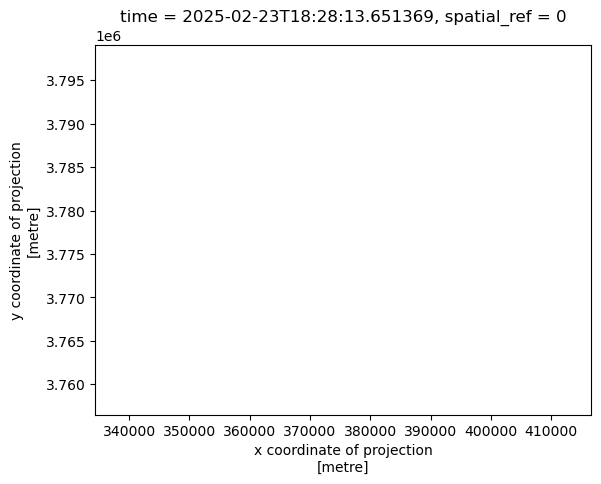

In [18]:
# Select the red, green and blue variables, convert it to a numpy.array and create an RGB image
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow()

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


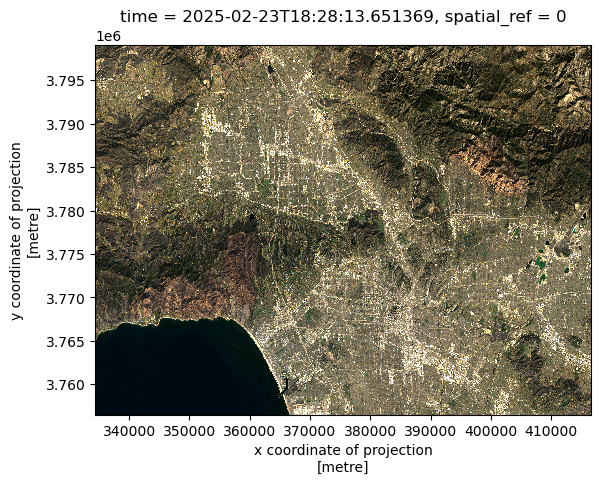

In [20]:
# Adjust the scale used for plotting the bands to get a true color image
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In [22]:
# Identify NaN values in bands
for i in ['red', 'green', 'blue']:
    # .isnull() creates a boolean array (True where NaN)
    # .sum() sums the True values (counts the NaNs)
    # .item() converts the single result to a standard Python integer
    nan_count = landsat_data[i].isnull().sum().item()
    print(f"The {i} band has {nan_count} NaN values.")

The red band has 0 NaN values.
The green band has 1 NaN values.
The blue band has 109 NaN values.


In [23]:
# Substitute the any nan values in the Landsat data for zero
landsat_data = landsat_data.fillna(0)

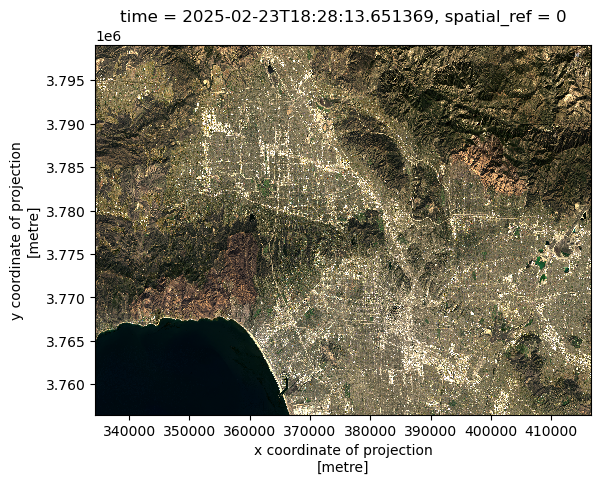

In [26]:
# Create a new true color image that gets plotted without warnings
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow(robust = True)

In a markdown cell write a brief explanation comparing the ouputs for parts (a) and (e).

# ANSWER THIS

## 6. False color image
Without creating any new variables, create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

In [33]:
# Print all data variable in the landsat_data dataset
print(list(landsat_data.data_vars))

['red', 'green', 'blue', 'nir08', 'swir22']


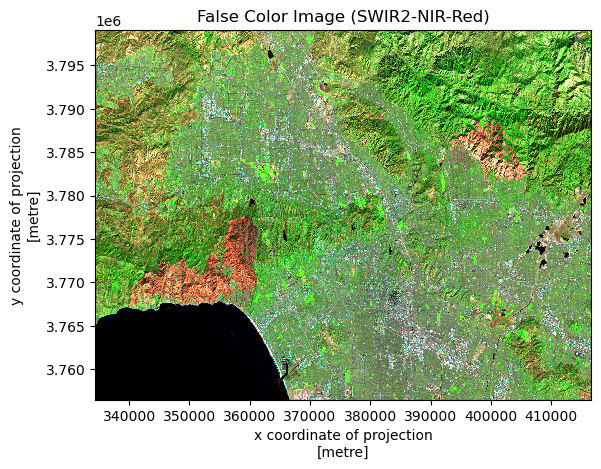

In [32]:
# Create false color image (SWIR2, NIR, Red)
landsat_data[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)
plt.title('False Color Image (SWIR2-NIR-Red)')
plt.show()

## 7. Map
Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

- Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [90]:
# Combine the two fire perimeter datasets into a single GeoDataFrame
fires = pd.concat([eaton, palisades], ignore_index = True)

# Convert CRS of the Eaton and Palisades fire perimeter to landsat data CRS
fires = fires.to_crs('epsg:32611')

In [71]:
fires.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# FIX THIS, INCOMPLETE

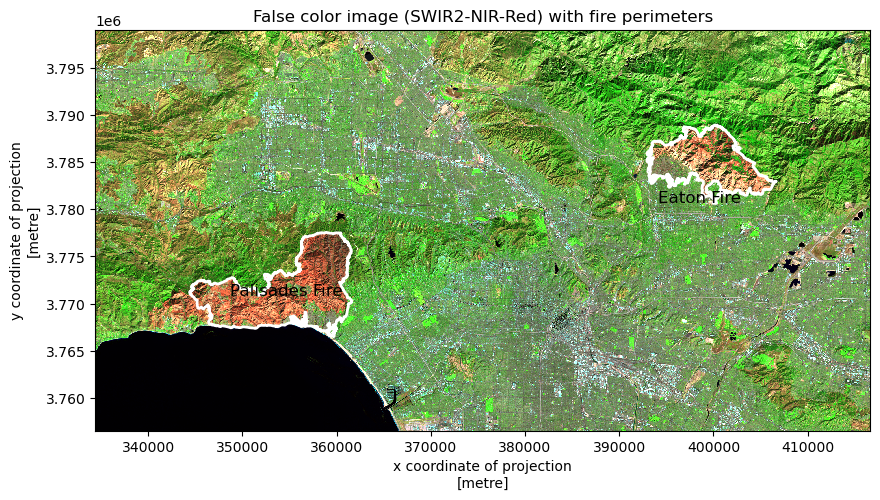

In [89]:
fig, ax = plt.subplots(figsize = (10, 8))

# Plot the false color composite as the base map
landsat_data[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True,
                                                                ax = ax,
                                                                add_colorbar = False)

fires.boundary.plot(ax = ax,
                   color = '#FFFFFF',
                   linewidth = 2)

# Get centroids for positioning
centroids = fires.geometry.centroid

# Add text for first fire (adjust index and name as needed)
ax.text(centroids.iloc[0].x, centroids.iloc[0].y, 'Eaton Fire', 
        fontsize = 12,
        color = 'black',
        ha = 'center',
        va = 'center')

# Add text for second fire
ax.text(centroids.iloc[40].x, centroids.iloc[40].y, 'Palisades Fire', 
        fontsize = 12, 
        color = 'black',
        ha = 'center',
        va = 'center')

plt.title('False color image (SWIR2-NIR-Red) with fire perimeters', fontsize = 12)
plt.show()